In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('FinalLoanData.csv')

In [3]:
df

,Unnamed: 0,Meets Credit Policy?,Interest Rate (%),Log Annual Income ($),FICO Score,Revolving Balance ($),Revolving Line Utilisation Rate,No. of Overdue Payments,No. of Derogatory Public Records,Loan Not Fully Paid
0,0,1,11.89,11.35,737,28854,52.1,0,0,0
1,1,1,10.71,11.08,707,33623,76.7,0,0,0
2,2,1,13.57,10.37,682,3511,25.6,0,0,0
3,3,1,10.08,11.35,712,33667,73.2,0,0,0
4,4,1,14.26,11.30,667,4740,39.5,1,0,0
...,...,...,...,...,...,...,...,...,...,...
9573,9573,0,14.61,12.18,672,215372,82.1,0,0,1
9574,9574,0,12.53,11.14,722,184,1.1,0,0,1
9575,9575,0,10.71,10.60,687,10036,82.9,0,0,1
9576,9576,0,16.00,10.82,692,0,3.2,0,0,1


In [4]:
df.columns = df.columns = ['Delete', 'Meets Credit Policy?', 'Interest Rate (%)', 'Log Annual Income ($)', 'FICO Score', 'Revolving Balance ($)', 'Revolving Line Utilisation Rate', 'No. of Overdue Payments', 'No. of Derogatory Public Records', 'Loan Not Fully Paid']

In [5]:
del df['Delete'] # Delete the extra row at the start we don't need

# FICO Score and Loan Not Fully Paid

In [6]:
FICO_cat1 = df.loc[(df['FICO Score'] < 650)] # 231 people
cat1_notfully = FICO_cat1.loc[(FICO_cat1['Loan Not Fully Paid'] == 1)] # 32.0%

FICO_cat2 = df.loc[(df['FICO Score'] >= 650) & (df['FICO Score'] < 700)] # 3990 people
cat2_notfully = FICO_cat2.loc[(FICO_cat2['Loan Not Fully Paid'] == 1)] # 20.0%

FICO_cat3 = df.loc[(df['FICO Score'] >= 700) & (df['FICO Score'] < 750)] # 3687 people
cat3_notfully = FICO_cat3.loc[(FICO_cat3['Loan Not Fully Paid'] == 1)] # 14.5%

FICO_cat4 = df.loc[(df['FICO Score'] >= 750) & (df['FICO Score'] < 800)] # 1525 people
cat4_notfully = FICO_cat4.loc[(FICO_cat4['Loan Not Fully Paid'] == 1)] # 7.5%

FICO_cat5 = df.loc[(df['FICO Score'] >= 800)] # 145 people
cat5_notfully = FICO_cat5.loc[(FICO_cat5['Loan Not Fully Paid'] == 1)] # 6.9%

# As expected, the higher someone's FICO score, the less likely they are to not pay back the loan fully.
# Yes, I can confirm that all the data entries are included within these 5 categories, as the grand total adds up to 9,578

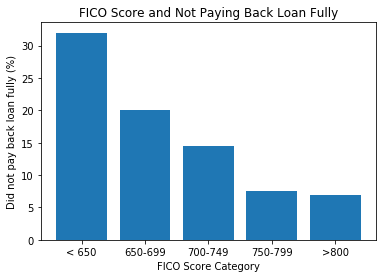

In [7]:
# Now plot these percentages in bar graph format!
# x-axis = FICO score category, y-axis = % of people within that category who didn't pay back fully

data = [32.0, 20.0, 14.5, 7.5, 6.9]
labels = ['< 650', '650-699', '700-749', '750-799', '>800']
plt.xticks(range(len(data)), labels)
plt.xlabel('FICO Score Category')
plt.ylabel('Did not pay back loan fully (%)')
plt.title('FICO Score and Not Paying Back Loan Fully')
plt.bar(range(len(data)), data)
plt.show()

This demonstrates that, the higher the FICO score, the less likely you are to not pay back your loan fully. 

# Meeting credit policy and Loan Not Fully Paid

In [8]:
met_policy = df.loc[(df['Meets Credit Policy?'] == 1)] #7,710
not_met_policy = df.loc[(df['Meets Credit Policy?'] == 0)] # 1,868

In [9]:
bar_1 = met_policy.loc[(met_policy['Loan Not Fully Paid'] == 1)] # 1014/7710 x 100 = 13.2%
bar_2 = not_met_policy.loc[(not_met_policy['Loan Not Fully Paid'] == 1)] # 519/1868 x 100 = 27.8%

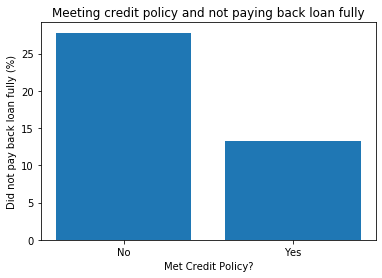

In [10]:
data = [27.8, 13.2]
labels = ['No', 'Yes']
plt.xticks(range(len(data)), labels)
plt.xlabel('Met Credit Policy?')
plt.ylabel('Did not pay back loan fully (%)')
plt.title('Meeting credit policy and not paying back loan fully')
plt.bar(range(len(data)), data)
plt.show()

An individual having met the credit policy significantly decreases their likelihood of having not paid the loan back fully.

# Interest Rate and Loan Not Fully Paid

In [11]:
# Split interest rates around average, which = 12.2%
# For below average and above average interest rates respectively, what percentage of these people 
# did not fully pay back the loan?

low_interest = df.loc[(df['Interest Rate (%)'] <= 12.2)] # 4620
high_interest = df.loc[(df['Interest Rate (%)'] > 12.2)] # 4958

In [12]:
low_not_fully = low_interest.loc[(low_interest['Loan Not Fully Paid'] == 1)] # 533/4620 x 100 = 11.5%
high_not_fully = high_interest.loc[(high_interest['Loan Not Fully Paid'] == 1)] # 1000/4958 x 100 = 20.2%

In [13]:
low_policy = low_interest.loc[(low_interest['Meets Credit Policy?'] == 0)] # 452/4620 x 100 = 9.8%
high_policy = high_interest.loc[(high_interest['Meets Credit Policy?'] == 0)] # 1416/4958 x 100 = 28.6%

Far more people who didn't meet credit policy were assigned high interest rate than those who did. Therefore, it's fair to say that not meeting credit policy caused Lending Club to charge high interest rates (as implied by descriptions on Kaggle). So, yes, interest rate DOES affect outcome 'not fully paid' but only through 'credit policy'

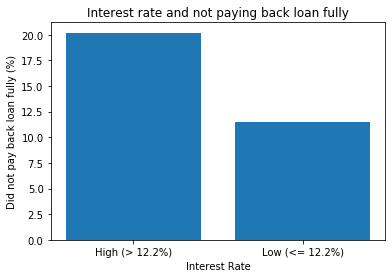

In [14]:
data = [20.2, 11.5]
labels = ['High (> 12.2%)', 'Low (<= 12.2%)']
plt.xticks(range(len(data)), labels)
plt.xlabel('Interest Rate')
plt.ylabel('Did not pay back loan fully (%)')
plt.title('Interest rate and not paying back loan fully')
plt.bar(range(len(data)), data)
plt.show()

# Personal financial prudence measusrements and FICO scores

## FICO Score and Revolving Line Utilisation Rate

In [15]:
FICO_cat1 = df.loc[(df['FICO Score'] < 650)] # 231 people
cat1_notfully = FICO_cat1.loc[(FICO_cat1['Loan Not Fully Paid'] == 1)] # 32.0%

FICO_cat2 = df.loc[(df['FICO Score'] >= 650) & (df['FICO Score'] < 700)] # 3990 people
cat2_notfully = FICO_cat2.loc[(FICO_cat2['Loan Not Fully Paid'] == 1)] # 20.0%

FICO_cat3 = df.loc[(df['FICO Score'] >= 700) & (df['FICO Score'] < 750)] # 3687 people
cat3_notfully = FICO_cat3.loc[(FICO_cat3['Loan Not Fully Paid'] == 1)] # 14.5%

FICO_cat4 = df.loc[(df['FICO Score'] >= 750) & (df['FICO Score'] < 800)] # 1525 people
cat4_notfully = FICO_cat4.loc[(FICO_cat4['Loan Not Fully Paid'] == 1)] # 7.5%

FICO_cat5 = df.loc[(df['FICO Score'] >= 800)] # 145 people
cat5_notfully = FICO_cat5.loc[(FICO_cat5['Loan Not Fully Paid'] == 1)] # 6.9%

In [16]:
# Within each FICO category, how many people had a line utilisation rate > 46.8 (the average)

util_low_FICO = FICO_cat1.loc[(FICO_cat1['Revolving Line Utilisation Rate'] > 46.8)] # 189/231 x 100 = 81.8%
util_med_FICO = FICO_cat3.loc[(FICO_cat3['Revolving Line Utilisation Rate'] > 46.8)] # 1665/3687 x 100 = 45.2%
util_high_FICO = FICO_cat5.loc[(FICO_cat5['Revolving Line Utilisation Rate'] > 46.8)] # 2/145 x 100 = 1.4%

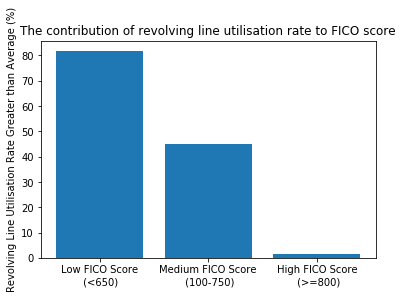

In [17]:
data = [81.8, 45.2, 1.4]
labels = ['Low FICO Score\n (<650)', 'Medium FICO Score\n (100-750)', 'High FICO Score\n (>=800)']
plt.xticks(range(len(data)), labels)
plt.xlabel('')
plt.ylabel('Revolving Line Utilisation Rate Greater than Average (%)')
plt.title('The contribution of revolving line utilisation rate to FICO score')
plt.bar(range(len(data)), data)
plt.show()

This demonstrates that the financial prudence measurement of revolving line utilisation (e.g. how much of the credit line they've used relative to what's available) significantly contributes towards an individual's FICO score.

## If someone has 1 or more derogatory public records, does that make them more likely to have a low FICO score?

In [18]:
FICO_cat1 = df.loc[(df['FICO Score'] < 650)] # 231 people
cat1_notfully = FICO_cat1.loc[(FICO_cat1['Loan Not Fully Paid'] == 1)] # 32.0%

FICO_cat2 = df.loc[(df['FICO Score'] >= 650) & (df['FICO Score'] < 700)] # 3990 people
cat2_notfully = FICO_cat2.loc[(FICO_cat2['Loan Not Fully Paid'] == 1)] # 20.0%

FICO_cat3 = df.loc[(df['FICO Score'] >= 700) & (df['FICO Score'] < 750)] # 3687 people
cat3_notfully = FICO_cat3.loc[(FICO_cat3['Loan Not Fully Paid'] == 1)] # 14.5%

FICO_cat4 = df.loc[(df['FICO Score'] >= 750) & (df['FICO Score'] < 800)] # 1525 people
cat4_notfully = FICO_cat4.loc[(FICO_cat4['Loan Not Fully Paid'] == 1)] # 7.5%

FICO_cat5 = df.loc[(df['FICO Score'] >= 800)] # 145 people
cat5_notfully = FICO_cat5.loc[(FICO_cat5['Loan Not Fully Paid'] == 1)] # 6.9%

In [19]:
derogatory_low_FICO = FICO_cat1.loc[(FICO_cat1['No. of Derogatory Public Records'] > 0)] # 18/231 x 100 = 7.8%
derogatory_med_FICO = FICO_cat3.loc[(FICO_cat3['No. of Derogatory Public Records'] > 0)] # 176/3687 x 100 = 4.8%
derogatory_high_FICO = FICO_cat5.loc[(FICO_cat5['No. of Derogatory Public Records'] > 0)] # 0/145 = 0%

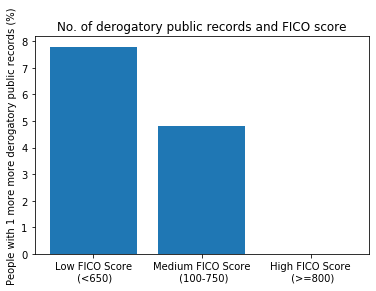

In [20]:
data = [7.8, 4.8, 0]
labels = ['Low FICO Score\n (<650)', 'Medium FICO Score\n (100-750)', 'High FICO Score\n (>=800)']
plt.xticks(range(len(data)), labels)
plt.xlabel('')
plt.ylabel('People with 1 more more derogatory public records (%)')
plt.title('No. of derogatory public records and FICO score')
plt.bar(range(len(data)), data)
plt.show()

## No. of overdue payments and FICO score

In [21]:
FICO_cat1 = df.loc[(df['FICO Score'] < 650)] # 231 people
cat1_notfully = FICO_cat1.loc[(FICO_cat1['Loan Not Fully Paid'] == 1)] # 32.0%

FICO_cat2 = df.loc[(df['FICO Score'] >= 650) & (df['FICO Score'] < 700)] # 3990 people
cat2_notfully = FICO_cat2.loc[(FICO_cat2['Loan Not Fully Paid'] == 1)] # 20.0%

FICO_cat3 = df.loc[(df['FICO Score'] >= 700) & (df['FICO Score'] < 750)] # 3687 people
cat3_notfully = FICO_cat3.loc[(FICO_cat3['Loan Not Fully Paid'] == 1)] # 14.5%

FICO_cat4 = df.loc[(df['FICO Score'] >= 750) & (df['FICO Score'] < 800)] # 1525 people
cat4_notfully = FICO_cat4.loc[(FICO_cat4['Loan Not Fully Paid'] == 1)] # 7.5%

FICO_cat5 = df.loc[(df['FICO Score'] >= 800)] # 145 people
cat5_notfully = FICO_cat5.loc[(FICO_cat5['Loan Not Fully Paid'] == 1)] # 6.9%

In [22]:
overdue_low_FICO = FICO_cat1.loc[(FICO_cat1['No. of Overdue Payments'] > 0)] # 45/231 x 100 = 19.5%
overdue_med_FICO = FICO_cat3.loc[(FICO_cat3['No. of Overdue Payments'] > 0)] # 293/3687 x 100 = 7.9%
overdue_high_FICO = FICO_cat5.loc[(FICO_cat5['No. of Overdue Payments'] > 0)] # 0/145 x 100 = 0%

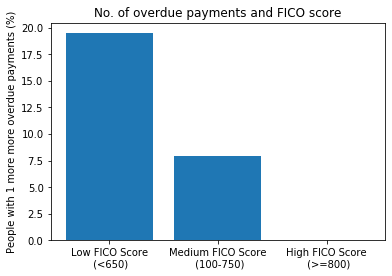

In [23]:
data = [19.5, 7.9, 0]
labels = ['Low FICO Score\n (<650)', 'Medium FICO Score\n (100-750)', 'High FICO Score\n (>=800)']
plt.xticks(range(len(data)), labels)
plt.xlabel('')
plt.ylabel('People with 1 more more overdue payments (%)')
plt.title('No. of overdue payments and FICO score')
plt.bar(range(len(data)), data)
plt.show()